# Notebook Lab 2 DSP
# Apartado: Tratamiento de imágenes
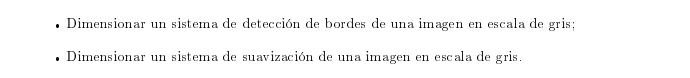

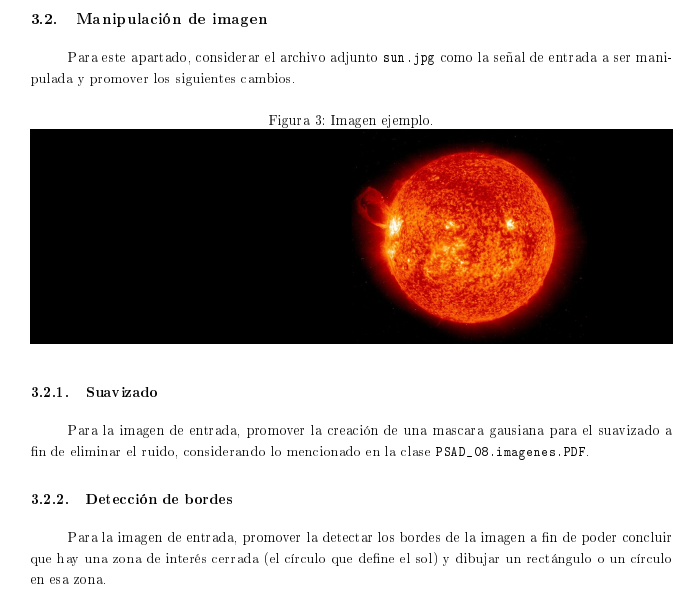

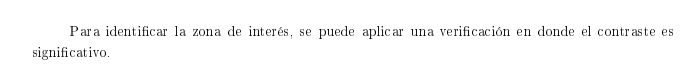


### 3.2.1 Suavizado

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import time
import cv2
from IPython.display import Video, HTML, display
from PIL import Image
from scipy.signal import convolve2d
cv2.__version__

'4.12.0'

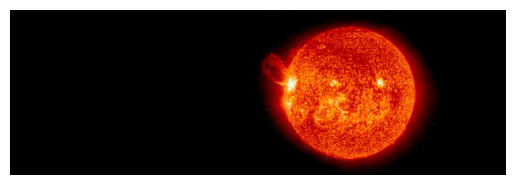

(640, 1920, 3)


In [112]:
img = cv2.imread("images/sun.jpg", 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img,cmap='gray')
plt.axis('off') 
plt.show()
print(np.shape(img))

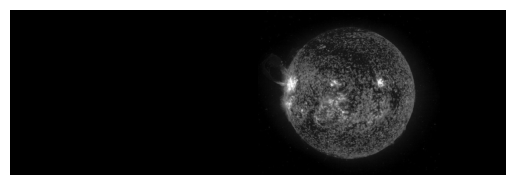

In [113]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray_img = rgb2gray(cv2.imread("images/sun.jpg",1))

plt.imshow(gray_img,cmap='gray')
plt.axis('off') 
plt.show()

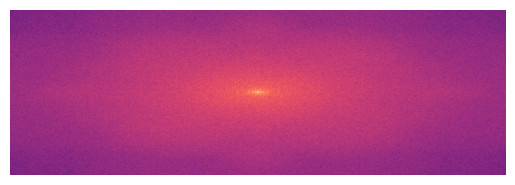

In [114]:
IMG = np.fft.fft2(gray_img)
IMG = np.fft.fftshift(IMG)
magnitude_spectrum = 20*np.log(np.abs(IMG))
plt.imshow(magnitude_spectrum, cmap = 'magma') 
plt.axis('off') 
plt.show()

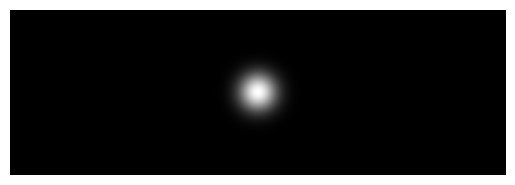

In [115]:
sigma_x, sigma_y = 50, 50 # 26, 26
(ncols, nrows) = np.shape(gray_img)
c_x, c_y = nrows/2, ncols/2
x = np.linspace(0, nrows, nrows)
y = np.linspace(0, ncols, ncols)
X, Y = np.meshgrid(x, y)
gaussian_mask = np.exp(-((X-c_x)**2 + (Y-c_y)**2)/(2*sigma_x**2)) / (2*np.pi*sigma_x**2)
plt.imshow(gaussian_mask, cmap = 'gray')
plt.axis('off') 
plt.show()

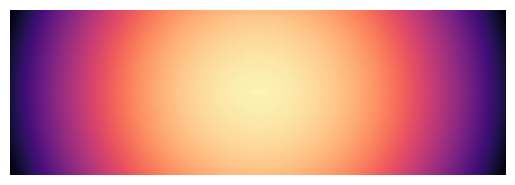

In [116]:
filtered_IMG = IMG * gaussian_mask
plt.imshow(20*np.log(np.abs(filtered_IMG)), cmap = 'magma')
plt.axis('off') 
plt.show()

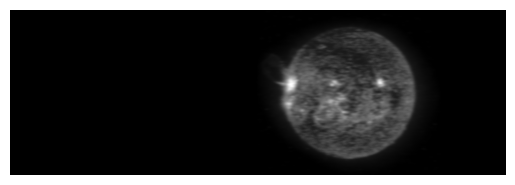

In [117]:
ifft_img = np.fft.ifft2(filtered_IMG)
plt.imshow(np.abs(ifft_img), cmap = 'gray')
plt.axis('off') 
plt.show()

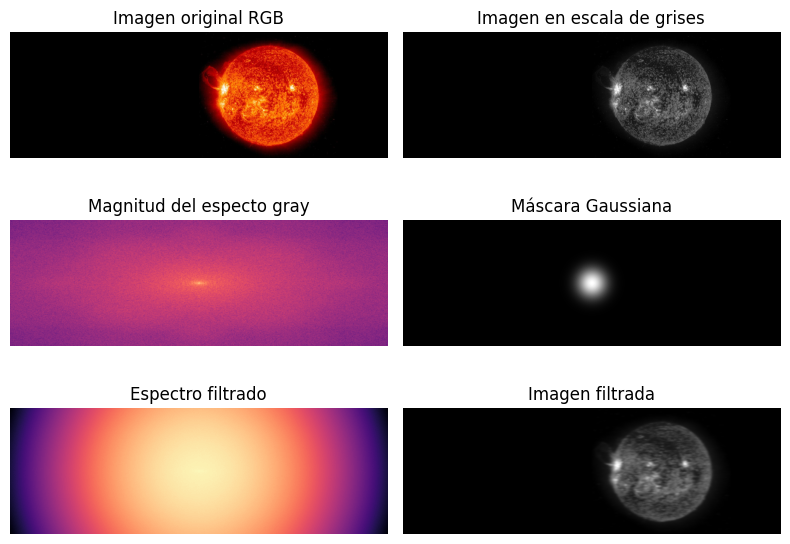

In [118]:
fig, axes = plt.subplots(3, 2, figsize=(8, 6))  

axes[0][0].imshow(img,cmap='gray')
axes[0][0].set_title('Imagen original RGB')
axes[0][0].axis('off') 

axes[0][1].imshow(gray_img,cmap='gray')
axes[0][1].set_title('Imagen en escala de grises')
axes[0][1].axis('off') 

axes[1][0].imshow(magnitude_spectrum, cmap = 'magma') 
axes[1][0].set_title('Magnitud del especto gray')
axes[1][0].axis('off') 

axes[1][1].imshow(gaussian_mask, cmap = 'gray')
axes[1][1].set_title('Máscara Gaussiana')
axes[1][1].axis('off') 

axes[2][0].imshow(20*np.log(np.abs(filtered_IMG)), cmap = 'magma')
axes[2][0].set_title('Espectro filtrado')
axes[2][0].axis('off') 

axes[2][1].imshow(np.abs(ifft_img), cmap = 'gray')
axes[2][1].set_title('Imagen filtrada')
axes[2][1].axis('off') 

plt.tight_layout() 
plt.show()

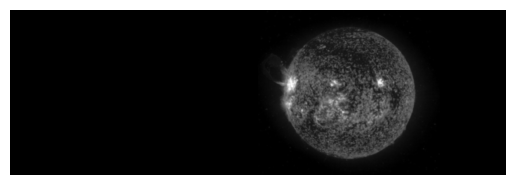

In [119]:
# con cv2
gauss_img = cv2.GaussianBlur(gray_img, (7, 7), 0)
plt.imshow(gauss_img, cmap='gray')
plt.axis('off') 
plt.show()

### 3.2.2 Detección de bordes

/tmp/ipykernel_13648/61802715.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  gray_u8 = ifft_img.astype(np.uint8)


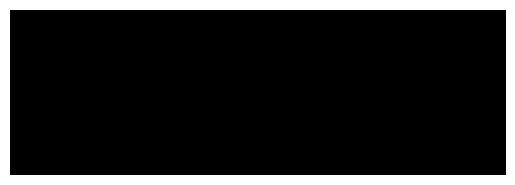

In [120]:
gray_u8 = ifft_img.astype(np.uint8)
bordes = cv2.Canny(gray_u8, 110, 250, 15)
plt.imshow(bordes, cmap='gray')
plt.axis('off') 
plt.show()

Suavizado y detección de bordes son de cierta forma opuestas, si se suaviza mucho la imagen es mucho más dificil encontrar bordes porque los gradientes son menores.

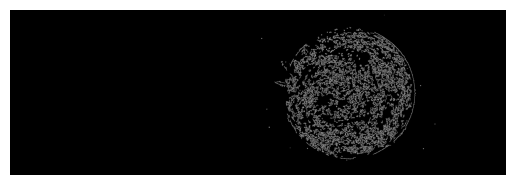

In [121]:
gray_u8 = gray_img.astype(np.uint8)
bordes = cv2.Canny(gray_u8, 110, 250, 15)
plt.imshow(bordes, cmap='gray')
plt.axis('off') 
plt.show()

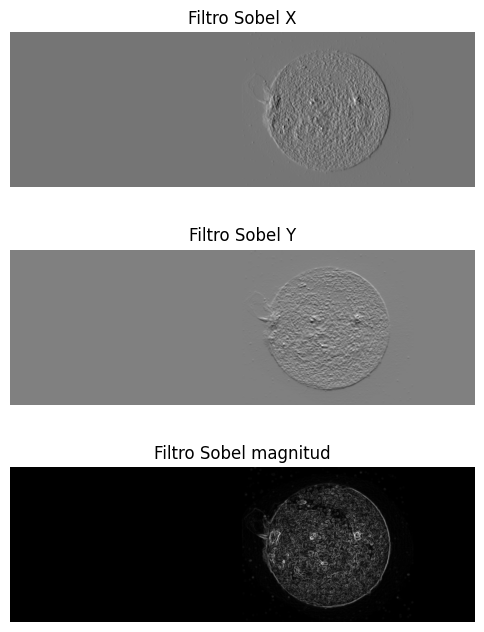

In [122]:
fig, axes = plt.subplots(3, 1, figsize=(6, 8))  
gray_u8 = gray_img.astype(np.uint8)
sobelx = cv2.Sobel(gray_u8, cv2.CV_64F, 1, 0, ksize=15)
sobely = cv2.Sobel(gray_u8, cv2.CV_64F, 0, 1, ksize=15)
sobel = cv2.magnitude(sobelx, sobely)
axes[0].imshow(sobelx, cmap='gray')
axes[0].set_title('Filtro Sobel X')
axes[0].axis('off') 
axes[1].imshow(sobely, cmap='gray')
axes[1].set_title('Filtro Sobel Y')
axes[1].axis('off') 
axes[2].imshow(sobel, cmap='gray')
axes[2].set_title('Filtro Sobel magnitud')
axes[2].axis('off') 
plt.show()

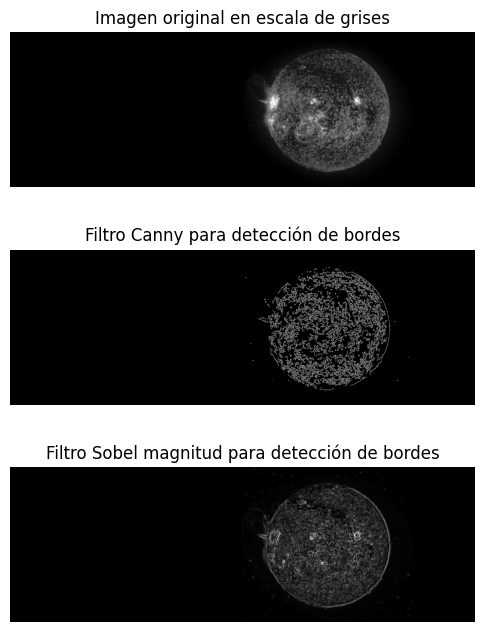

In [123]:
fig, axes = plt.subplots(3, 1, figsize=(6, 8))  

axes[0].imshow(gray_img, cmap='gray')
axes[0].set_title('Imagen original en escala de grises')
axes[0].axis('off') 
axes[1].imshow(bordes, cmap='gray')
axes[1].set_title('Filtro Canny para detección de bordes')
axes[1].axis('off') 
axes[2].imshow(sobel, cmap='gray')
axes[2].set_title('Filtro Sobel magnitud para detección de bordes')
axes[2].axis('off') 
plt.show()

cantidad de circulos encontrados: 1


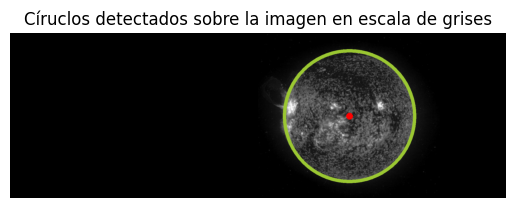

In [124]:
gauss_img = cv2.GaussianBlur(gray_img, (3, 3), 0)
in_img = gauss_img.astype(np.uint8)
circles = cv2.HoughCircles(in_img, cv2.HOUGH_GRADIENT, 2.5, 500, minRadius=200,maxRadius=320)
print("cantidad de circulos encontrados:", circles.shape[1] if circles is not None else 0)
cimg = cv2.cvtColor(in_img, cv2.COLOR_GRAY2BGR)
if circles is not None:
    circles = np.uint16(np.around(circles)) # redefinir tipo de datos
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(cimg,(i[0],i[1]),i[2],(155,200,50),12) # dibujar los circulos identificados en verde (BGR)
        # draw the center of the circle
        cv2.circle(cimg,(i[0],i[1]),5,(255,0,0),15)# dibujar los centros de circulos identificados en rojo (BGR)

plt.imshow(cimg,cmap='gray')
plt.axis('off') 
plt.title("Círuclos detectados sobre la imagen en escala de grises")
plt.show()

(640, 1920)


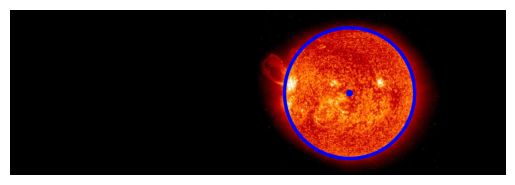

In [125]:
o_img = img.astype(np.uint8)

print(np.shape(in_img))
if circles is not None:
    circles = np.uint16(np.around(circles)) # redefinir tipo de datos
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(o_img,(i[0],i[1]),i[2],(0,0,255),12) # dibujar los circulos identificados en verde (BGR)
        # draw the center of the circle
        cv2.circle(o_img,(i[0],i[1]),5,(0,0,255),15) # dibujar los centros de circulos identificados en rojo (BGR)

plt.imshow(o_img)
plt.axis('off') 
plt.show()

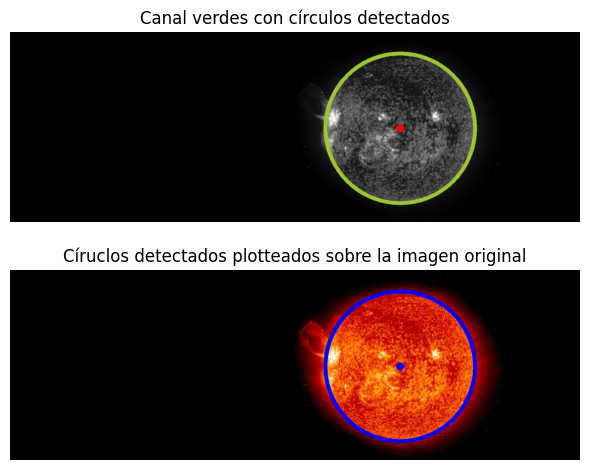

In [126]:
# Crear figura y ejes (2 filas, 1 columna)
fig, axes = plt.subplots(2, 1, figsize=(6, 5))  # 2 filas, 1 columna

# Primer subplot (arriba)
axes[0].imshow(cimg)
axes[0].set_title('Canal verdes con círculos detectados')
axes[0].axis('off')

# Segundo subplot (abajo)
axes[1].imshow(o_img)
axes[1].set_title('Círuclos detectados plotteados sobre la imagen original')
axes[1].axis('off')

plt.tight_layout()  # Ajusta espacios para que no se sobrepongan
plt.show()

Se probaron muchas combinaciones de parámetros para cv2.HoughCircles. Para minizar la cantidad de círculos sabiendo que se buscaba solo 1, fue clave usar una distancia entre centros grande (500), y jugar con radios también grandes (320 es el máximo por dimension de la imagen). Reescalar la imagen sobre 2.5 (más chica) también ayudó. Por último, aunque en el pipeline va primero, el filtro gaussiano para eliminar ruido con un kernel chico (3x3) fue lo que terminó de ajustar bien el circulo deseado; un kernel mayor era contraproducente por el poco contraste resultante.

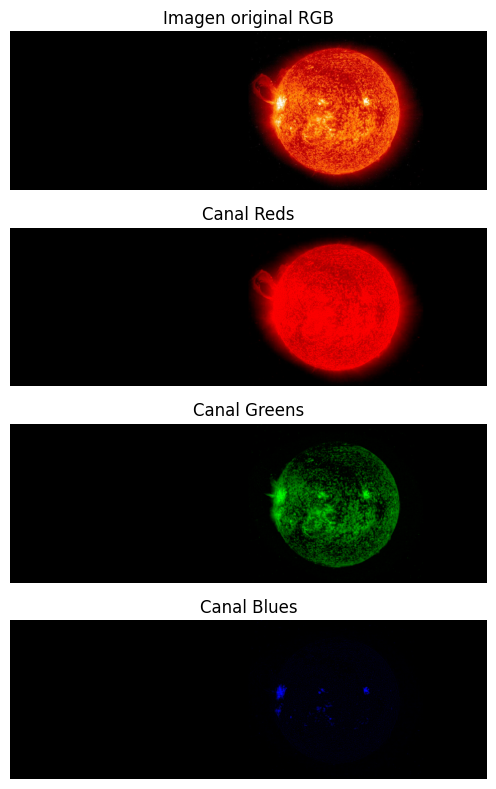

In [127]:
cmaps = ['Reds', 'Greens', 'Blues']
h, w = in_img.shape


fig, axes = plt.subplots(4, 1, figsize=(6, 8))  # 2 filas, 1 columna
axes[0].imshow(img)
axes[0].set_title('Imagen original RGB')
axes[0].axis('off')

for channel in range(3):
    rgb_img = np.zeros((h, w, 3), dtype=np.uint8)
    rgb_img[..., channel] = img[...,channel]  # verde
    axes[channel+1].imshow(rgb_img, cmap=cmaps[channel])
    axes[channel+1].set_title('Canal '+ cmaps[channel])
    axes[channel+1].axis('off')

plt.tight_layout()  # Ajusta espacios para que no se sobrepongan
plt.show()

Quizá se podría probar algo solo trabajando con algún canal más util, o cambiando los valores del rgb2gray().

cantidad de circulos encontrados: 1
(640, 1920)


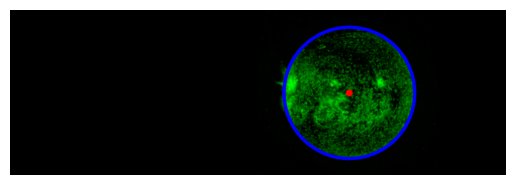

In [128]:
in_img = img[...,1].astype(np.uint8)
in_img = cv2.GaussianBlur(in_img, (5, 5), 0)
circles = cv2.HoughCircles(in_img, cv2.HOUGH_GRADIENT, 2.0, 600, minRadius=200,maxRadius=320)
print("cantidad de circulos encontrados:", circles.shape[1] if circles is not None else 0)

h, w = in_img.shape
rgb_img = np.zeros((h, w, 3), dtype=np.uint8)
rgb_img[..., 1] = in_img  # verde

print(np.shape(in_img))
if circles is not None:
    circles = np.uint16(np.around(circles)) # redefinir tipo de datos
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(rgb_img,(i[0],i[1]),i[2],(0,0,255),12) # dibujar los circulos identificados en verde (BGR)
        # draw the center of the circle
        cv2.circle(rgb_img,(i[0],i[1]),5,(255,0,0),15) # dibujar los centros de circulos identificados en rojo (BGR)

plt.imshow(rgb_img,cmap='Greens')
plt.axis('off') 
plt.show()

(640, 1920)


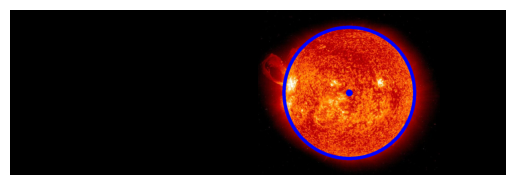

In [129]:
o_img = img.astype(np.uint8)

print(np.shape(in_img))
if circles is not None:
    circles = np.uint16(np.around(circles)) # redefinir tipo de datos
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(o_img,(i[0],i[1]),i[2],(0,0,255),12) # dibujar los circulos identificados en verde (BGR)
        # draw the center of the circle
        cv2.circle(o_img,(i[0],i[1]),5,(0,0,255),15) # dibujar los centros de circulos identificados en rojo (BGR)

plt.imshow(o_img)
plt.axis('off') 
plt.show()

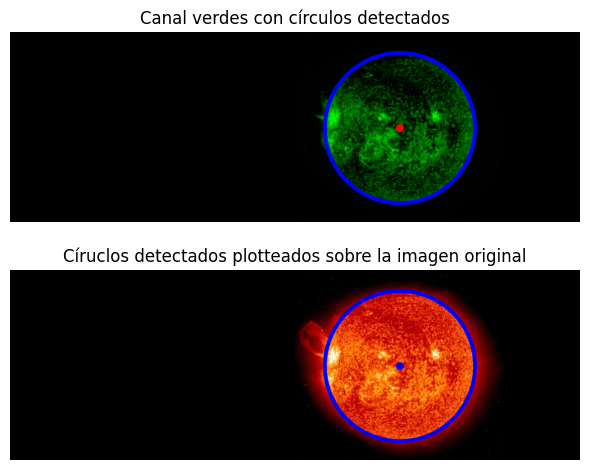

In [130]:
# Crear figura y ejes (2 filas, 1 columna)
fig, axes = plt.subplots(2, 1, figsize=(6, 5))  # 2 filas, 1 columna

# Primer subplot (arriba)
axes[0].imshow(rgb_img,cmap='Greens')
axes[0].set_title('Canal verdes con círculos detectados')
axes[0].axis('off')

# Segundo subplot (abajo)
axes[1].imshow(o_img)
axes[1].set_title('Círuclos detectados plotteados sobre la imagen original')
axes[1].axis('off')

plt.tight_layout()  # Ajusta espacios para que no se sobrepongan
plt.show()